In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

from matplotlib import pyplot as plt
from dotenv import load_dotenv
from sklearn import preprocessing, model_selection, linear_model
from sklearn import metrics, dummy

from models.linear_regressions import Linear_reg

load_dotenv()
sns.color_palette('colorblind')
plt.style.use('Solarize_Light2')

# Setting default DPI, pulling it from dotenv if it exists, setting it on 100 if not

try:
    pc_cores = int(os.getenv('CORES'))

except TypeError:
    pc_cores = 4

try:
    pc_dpi = int(os.getenv('DPI'))

except TypeError:
    pc_dpi = 100

if pc_dpi is None:
    pc_dpi = 100

if pc_dpi >= 155:
    pc_dpi = 155

## NOTES : cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)


In [46]:
file_ghg_eui = "./data/seattle_predict_ghg_eui.csv"


In [47]:
df_model = pd.read_csv(file_ghg_eui).astype(float)

df_model.columns


Index(['OSEBuildingID', 'scaled_Electricity(kWh)',
       'scaled_GHGEmissionsIntensity(kgCO2e/ft2)',
       'scaled_PropertyArea(SquareMetre)Total', 'scaled_SourceEUI(kWh/m2)',
       'scaled_NaturalGas(kWh)', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'ENERGYSTARScore', 'Building_proportion',
       'Parking_proportion', 'target_SourceEUI(kWh/m2)',
       'target_GHGEmissionsIntensity(kgCO2e/ft2)', 'ohe_nbhood_BALLARD',
       'ohe_nbhood_CENTRAL', 'ohe_nbhood_DELRIDGE', 'ohe_nbhood_DOWNTOWN',
       'ohe_nbhood_EAST', 'ohe_nbhood_GREATER DUWAMISH',
       'ohe_nbhood_LAKE UNION', 'ohe_nbhood_MAGNOLIA / QUEEN ANNE',
       'ohe_nbhood_NORTH', 'ohe_nbhood_NORTHEAST', 'ohe_nbhood_NORTHWEST',
       'ohe_nbhood_SOUTHEAST', 'ohe_nbhood_SOUTHWEST', 'ohe_ptype_Hospital',
       'ohe_ptype_Hotel', 'ohe_ptype_K-12 School', 'ohe_ptype_Large Office',
       'ohe_ptype_Mixed Use Property', 'ohe_ptype_Office', 'ohe_ptype_Other',
       'ohe_ptype_Refrigerated Warehouse', 'ohe_pty

In [48]:
df_model.set_index("OSEBuildingID", inplace=True)
df_model.dropna(inplace=True)


In [49]:
# Target_1 : target_GHGEmissionsIntensity(kgCO2e/ft2) : two cols

droplist_1 = [
    "scaled_GHGEmissionsIntensity(kgCO2e/ft2)",  # Scaled target
    "target_SourceEUI(kWh/m2)"  # not to scale
    ]

df_model_ghg = df_model.drop(columns=droplist_1)


In [92]:
ghg_target = "target_GHGEmissionsIntensity(kgCO2e/ft2)"
ghg_regression = Regressions(dataframe=df_model_ghg, target_col=ghg_target)


In [97]:
alpha_range = np.arange(10, 70, 0.05)

ridge_cv_l_one_out = linear_model.RidgeCV(
    fit_intercept=False,
    alphas=alpha_range,
    store_cv_values=True
    )

ridge_cv_l_one_out.fit(ghg_regression.X_train, ghg_regression.y_train)


RidgeCV(alphas=array([10.  , 10.05, 10.1 , ..., 69.85, 69.9 , 69.95]),
        fit_intercept=False, store_cv_values=True)

In [98]:
mses_ridge = np.mean(ridge_cv_l_one_out.cv_values_, axis=0)[0]
rmses_ridge = np.sqrt(mses_ridge)
predict_train = ridge_cv_l_one_out.predict(X=ghg_regression.X_train)


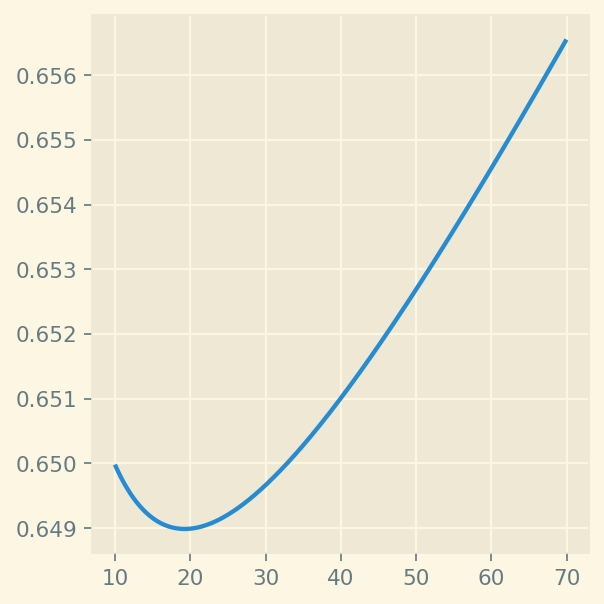

In [99]:
fig, (ax1) = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(4, 4),
    dpi=pc_dpi,
)

ax1.plot(ridge_cv_l_one_out.alphas, np.sqrt(mses_ridge))

###
# Titles/Lables

#
###
plt.tight_layout()
plt.show()


In [54]:
print(ridge_cv_l_one_out.alpha_)
np.sqrt(abs(ridge_cv_l_one_out.best_score_))


20.0


0.6726407242916446

In [100]:
alpha_range = np.arange(0.1, 30, 0.05)

kfolds = model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

ridge_cv_kfolds = linear_model.RidgeCV(
    fit_intercept=False,
    alphas=alpha_range,
    cv=kfolds
    )

ridge_cv_kfolds.fit(ghg_regression.X_train, ghg_regression.y_train)


RidgeCV(alphas=array([ 0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,
        0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95,
        1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ,
        1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,  1.8 ,  1.85,
        1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,  2.25,  2.3 ,
        2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,  2.7 ,  2.75,
        2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,  3.15,  3.2 ,
        3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,  3.6 ,  3.65,
        3.7 ,  3.7...
       27.1 , 27.15, 27.2 , 27.25, 27.3 , 27.35, 27.4 , 27.45, 27.5 ,
       27.55, 27.6 , 27.65, 27.7 , 27.75, 27.8 , 27.85, 27.9 , 27.95,
       28.  , 28.05, 28.1 , 28.15, 28.2 , 28.25, 28.3 , 28.35, 28.4 ,
       28.45, 28.5 , 28.55, 28.6 , 28.65, 28.7 , 28.75, 28.8 , 28.85,
       28.9 , 28.95, 29.  , 29.05, 29.1 , 29.15, 29.2 , 29.25, 29.3 ,
       29.35, 29.4 , 29.45, 29.5 , 29.55, 29.6 , 29.6

In [101]:
print(np.sqrt(ridge_cv_kfolds.best_score_))
print(ridge_cv_kfolds.alpha_)

0.7570740096028891
29.95000000000001


On ne peut verifier la qualité de la regression que s'il on peut evaluer les differentes valeurs de lambda en fonction de la validation croisee. La seule validation croisee precise permettant cela est la validation Leave One Out (defaut)

Construction d'une classe permettant d'ajuster ces parametres au besoin

In [57]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from matplotlib import pyplot as plt


class Linear_reg():

    common_parameters = {
        "scoring": "neg_mean_squared_error",
        "cv": None,  # Default = Leave One Out
        "n_jobs": -1  # Use all cores
    }

    def __init__(self, dataframe: pd.DataFrame, target: str, override_common: dict = None, split: float = None):
        self.df_origin = dataframe

        ##
        # Train test split
        self.df_train, self.df_test = train_test_split(self.df_origin, test_size=split)
        self.X_train = self.df_train.drop(columns=target).to_numpy()
        self.X_test = self.df_test.drop(columns=target).to_numpy()

        self.y_train = self.df_train[[target]].to_numpy()
        self.y_test = self.df_test[[target]].to_numpy()
        #
        ##

        self.std_calc, self.ridge_calc, self.lasso_calc, self.enet_calc = False, False, False, False
        self.listed_ytrain = [value[0] for value in self.y_train]
        self.listed_ytest = [value[0] for value in self.y_test]
        self.df_predictions = pd.DataFrame({"True": self.listed_ytest})

        # Dummy
        dummy_reg = DummyRegressor()
        scores_dummy = cross_validate(
            estimator=dummy_reg,
            X=self.X_train,
            y=self.y_train,
            scoring=["neg_mean_squared_error", "r2"],
            n_jobs=-1,
        )

        dummy_reg.fit(X=self.X_train, y=self.y_train)

        y_pred_dummy = dummy_reg.predict(self.X_test)
        dummy_reg.fit(
                X=self.X_train,
                y=self.y_train
            )

        # Metrics Train
        dummy_mean_mse_train = scores_dummy["test_neg_mean_squared_error"].mean()
        rmse_dummy_train = np.sqrt(abs(dummy_mean_mse_train))
        r2_dummy_train = scores_dummy["test_r2"].mean()
        # /Metrics Train

        # Metrics Test
        dummy_mse_test = metrics.mean_squared_error(y_pred=y_pred_dummy, y_true=self.y_test)
        dummy_rmse_test = np.sqrt(abs(dummy_mse_test))
        std_r2_test = metrics.r2_score(y_pred=y_pred_dummy, y_true=self.y_test)
        self.table_dummy = Linear_reg.get_table(
            scores_train=(rmse_dummy_train, r2_dummy_train),
            scores_test=(dummy_rmse_test, std_r2_test)
            )
        # /Dummy

    def get_table(scores_train, scores_test):
        # Tuple shape : [0] = RMSE, [1] = R2
        return pd.DataFrame(
            columns=["RMSE", "R2"],
            data=[[scores_train[0], scores_test[0]], [scores_train[1], scores_test[1]]],
            index=["Train", "Test"]
        )

    def get_plot(rmse_list, alpha_list):
        ax = plt.plot(alpha_list, rmse_list)
        return ax

    def standard_regression(self):

        self.lin_reg = LinearRegression(fit_intercept=False)

        scores_regression = cross_validate(
                    self.lin_reg,
                    X=self.X_train,
                    y=self.y_train,
                    scoring=["neg_mean_squared_error", "r2"],
                    cv=Linear_reg.common_parameters["cv"],
                    n_jobs=Linear_reg.common_parameters["n_jobs"],
                )
        self.lin_reg.fit(
            X=self.X_train,
            y=self.y_train
        )
        # Metrics Train
        std_reg_mean_mse_train = scores_regression["test_neg_mean_squared_error"].mean()
        std_mean_rmse_train = np.sqrt(abs(std_reg_mean_mse_train))
        std_mean_r2_train = scores_regression["test_r2"].mean()
        # /Metrics Train
        y_pred_basic = self.lin_reg.predict(self.X_test)
        # Metrics Test
        std_mse_test = metrics.mean_squared_error(y_pred=y_pred_basic, y_true=self.y_test)
        std_rmse_test = np.sqrt(abs(std_mse_test))
        std_r2_test = metrics.r2_score(y_pred=y_pred_basic, y_true=self.y_test)
        # /Metrics Test
        self.std_table = Linear_reg.get_table(
            scores_train=(std_mean_rmse_train, std_mean_r2_train),
            scores_test=(std_rmse_test, std_r2_test)
        )
        self.df_predictions["basic_regression"] = y_pred_basic
        self.std_calc = True

    def ridge_cv_oneout(self, alphas):
        """
        Used to cross validate and find best hyperparameters
        for ridge and lasso !only!, elasticNet is too different
        to be generalized
        """
        self.ridge_cv = RidgeCV(
            fit_intercept=False,
            alphas=alphas,
            store_cv_values=True,
        )

        self.ridge_cv.fit(
            X=self.X_train,
            y=self.y_train
        )

        self.ridge_best_alpha = self.ridge_cv.alpha_

        # Metrics Train
        predict_train = self.ridge_cv.predict(X=self.X_train)
        mses_ridge = np.mean(self.ridge_cv.cv_values_, axis=0)[0]
        rmses_ridge = np.sqrt(abs(mses_ridge))
        rmse_train = np.sqrt(abs(self.ridge_cv.best_score_))
        r2_train = metrics.r2_score(y_pred=predict_train, y_true=self.y_train)
        # /Metrics Train

        y_predict = self.ridge_cv.predict(X=self.X_test)

        # Metrics Test
        mse_test = metrics.mean_squared_error(y_pred=y_predict, y_true=self.y_test)
        rmse_test = np.sqrt(abs(mse_test))
        r2_test = metrics.r2_score(y_pred=y_predict, y_true=self.y_test)
        # /Metrics Test

        self.ridge_table = Linear_reg.get_table(
            scores_train=(rmse_train, r2_train),
            scores_test=(rmse_test, r2_test)
        )
        self.ridge_ax = Linear_reg.get_plot(rmse_list=rmses_ridge, alpha_list=self.ridge_cv.alphas)
        self.df_predictions["Ridge"] = y_predict

    def lasso_cv_oneout(self, alphas, cv_method=10):
        self.lasso_cv = LassoCV(
            fit_intercept=False,
            alphas=alphas,
            cv=cv_method,
            n_jobs=Linear_reg.common_parameters["n_jobs"]
        )
        self.lasso_cv.fit(
                X=self.X_train,
                y=self.listed_ytrain
            )
        
        self.lasso_best_alpha = self.lasso_cv.alpha_

        # Metrics Train
        predict_train = self.lasso_cv.predict(X=self.X_train)
        mses = self.lasso_cv.mse_path_
        mse_avg = []

        for mse_list in mses:
            mse_avg.append(np.mean(mse_list))

        rmses_lasso = np.sqrt(mse_avg)
        rmse_train = np.min(rmses_lasso)
        r2_train = metrics.r2_score(y_pred=predict_train, y_true=self.listed_ytrain)
        # /Metrics Train

        y_predict = self.lasso_cv.predict(X=self.X_test)

        # Metrics Test
        mse_test = metrics.mean_squared_error(y_pred=y_predict, y_true=self.y_test)
        rmse_test = np.sqrt(abs(mse_test))
        r2_test = metrics.r2_score(y_pred=y_predict, y_true=self.y_test)
        # /Metrics Test

        self.lasso_table = Linear_reg.get_table(
            scores_train=(rmse_train, r2_train),
            scores_test=(rmse_test, r2_test)
        )
        self.lasso_ax = Linear_reg.get_plot(rmse_list=mse_avg, alpha_list=self.lasso_cv.alphas_)
        self.df_predictions["Lasso"] = y_predict

    def elastic_net_cv_oneout(self, override_default: dict = None):

        enet_parameters = Linear_reg.common_parameters
        print("Step : Elastic Net")
        l1_range = np.arange(0.01, 0.99, 0.05)
        self.elnet_cv = ElasticNetCV(
            l1_ratio=l1_range,
            n_alphas=150,
            n_jobs=enet_parameters["n_jobs"],
            fit_intercept=False,

        )

        self.elnet_cv.fit(
            X=self.X_train,
            y=self.listed_ytrain
        )

        self.enet_best_l1_ratio = self.elnet_cv.l1_ratio_
        self.enet_best_alpha = self.elnet_cv.alpha_
        mses_elnet = self.elnet_cv.mse_path_
        y_pred_enet = self.elnet_cv.predict(self.X_test)
        # Metrics Train
        predict_train = self.elnet_cv.predict(X=self.X_train)
        mses = self.elnet_cv.mse_path_
        mse_avg = []

        for mse_list in mses:
            mse_avg.append(np.mean(mse_list))

        rmses_elnet = np.sqrt(mse_avg)
        rmse_train = np.min(rmses_elnet)
        r2_train = metrics.r2_score(y_pred=predict_train, y_true=self.listed_ytrain)
        # /Metrics Train

        y_predict = self.elnet_cv.predict(X=self.X_test)

        # Metrics Test
        mse_test = metrics.mean_squared_error(y_pred=y_predict, y_true=self.y_test)
        rmse_test = np.sqrt(abs(mse_test))
        r2_test = metrics.r2_score(y_pred=y_predict, y_true=self.y_test)
        # /Metrics Test

        self.elnet_table = Linear_reg.get_table(
            scores_train=(rmse_train, r2_train),
            scores_test=(rmse_test, r2_test)
        )

        self.df_predictions["Elastic_Net"] = y_pred_enet

        self.enet_calc = True


In [58]:
dummy_reg = DummyRegressor()
scores_dummy = model_selection.cross_validate(
    estimator=dummy_reg,
    X=ghg_regression.X_train,
    y=ghg_regression.y_train,
    n_jobs=-1,
    scoring=["neg_mean_squared_error", "r2"]
)


In [59]:
# metrics.mean_squared_error(y_true=ghg_regression.y_train, y_pred=scores_dummy)
# np.sqrt(abs(scores_dummy.mean()))
scores_dummy.keys()

dict_keys(['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2'])

In [60]:
predict_train = ridge_cv_l_one_out.predict(X=ghg_regression.X_train)


In [61]:
metrics.r2_score(y_pred=predict_train, y_true=ghg_regression.y_train)

0.613886644570513

In [62]:
ridge_cv_l_one_out.best_score_

-0.4524455439755882

In [63]:
alpha_range = np.arange(0.2, 50, 0.05)

def getax():
    ax = plt.plot(alpha_range, np.sqrt(mses_ridge))
    return ax

###
# Titles/Lables

#
###
# plt.tight_layout()
# plt.show()


In [64]:
ghg_new_reg = Linear_reg(dataframe=df_model_ghg, target=ghg_target)


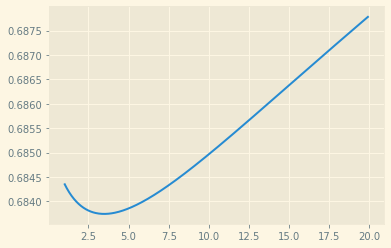

In [65]:
alpha_range = np.arange(1, 20, 0.05)

ghg_new_reg.ridge_cv_oneout(alphas=alpha_range)

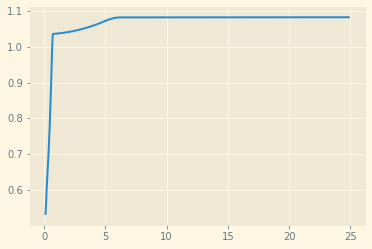

In [66]:
# alpha_lasso =np.arange(0.01, 15, 0.05)
alpha_range = np.arange(0.1, 25, 0.05)

ghg_new_reg.lasso_cv_oneout(alphas=alpha_range)


In [67]:
ghg_new_reg.elastic_net_cv_oneout()

Step : Elastic Net


In [68]:
ghg_new_reg.ridge_table

,RMSE,R2
Train,0.683743,0.689510
Test,0.661270,0.491217


In [69]:
ghg_new_reg.lasso_table

,RMSE,R2
Train,0.727662,0.730391
Test,0.529353,0.429097


In [70]:
ghg_new_reg.standard_regression()


In [71]:
ghg_new_reg.std_table


,RMSE,R2
Train,0.683230,0.693248
Test,0.559239,0.485685


In [72]:
ghg_new_reg.elnet_table


,RMSE,R2
Train,1.077587,0.950850
Test,0.036893,0.032446


In [77]:
# alphas = np.arange(0.1, 20, 0.1)
elnet_kfolds = linear_model.ElasticNetCV(
    fit_intercept=False,
    cv=model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    )

elnet_kfolds.fit(
    X=ghg_new_reg.X_train,
    y=ghg_new_reg.listed_ytrain
)


ElasticNetCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             fit_intercept=False)

In [78]:
elnet_kfolds.alpha_

4.074568049155147

In [80]:
elnet_kfolds.l1_ratio_

0.5

array([[1.94882891, 1.91043227, 2.51117077, ..., 2.92603231, 1.65264602,
        2.82724   ],
       [1.81997097, 1.7837371 , 2.38083934, ..., 2.80092562, 1.5211166 ,
        2.68790113],
       [1.70864857, 1.67433387, 2.24344517, ..., 2.65786147, 1.40726386,
        2.56324873],
       ...,
       [0.98987754, 0.98752486, 1.17447159, ..., 1.48810868, 0.70782152,
        1.64652918],
       [0.98787041, 0.98653156, 1.17332984, ..., 1.48605438, 0.70882778,
        1.64448483],
       [0.9860461 , 0.98566857, 1.17231875, ..., 1.48421154, 0.70982942,
        1.64265387]])